# Analysis of crime during Covid time
#By- Aarush Kumar
#Dated:November 13,2021

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
data = sorted(glob('/home/aarush100616/Downloads/Projects/Covid & Crime Analysis/Data/*metropolitan-street.csv'))

crimes = pd.concat((pd.read_csv(file).assign(filename = file)
                    for file in data), ignore_index = True)
crimes['Year'] =  crimes.Month.str.slice(0,4)
crimes['Month'] = crimes.Month.str.slice(5)
result = crimes['LSOA name'].str.rpartition()
crimes['Region'] = result[0]
crimes.drop(['Crime ID', 'Reported by','Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Last outcome category', 'Context', 'filename'], axis=1, inplace=True)
columns_headings = ['Month', 'Crime_Type', 'Year', 'Region']
crimes.columns = columns_headings

# Reorder the columns using '.reindex' 
neworder = ['Region','Year','Month','Crime_Type']
crimes=crimes.reindex(columns=neworder)

In [15]:
with_region = crimes.Region.notna().sum()
without_region = crimes.Region.isna().sum()
total_crimes = crimes.Crime_Type.count()

percentage_missing = (without_region / total_crimes)
percentage_complete = (with_region / total_crimes)

fstring = f'Total Crimes: {total_crimes:,}\n'
fstring = fstring + f'Crimes with region: {with_region:,}\nCrimes missing region: {without_region:,}\n'
fstring = fstring  + f'Percentage missing Region: {percentage_missing:.2%}\n'
fstring = fstring  + f'Percentage with Region: {percentage_complete:.2%}'
print(fstring)

Total Crimes: 1,181,922
Crimes with region: 1,176,294
Crimes missing region: 5,628
Percentage missing Region: 0.48%
Percentage with Region: 99.52%


In [16]:
# Count Crimes by Region then Sort Descending
# The top 33 values will (should) contain all the London Boroughs
region_summary = crimes.groupby(['Region']).Region.count()
sorted_region_summary = region_summary.sort_values(ascending=False)
data = sorted_region_summary.head(33)
boroughs = data.index.to_list()

In [17]:
# Create one dataframe for Met Crimes and one for all others
met_crimes = crimes.loc[crimes.Region.isin(boroughs)]
non_met_crimes = crimes.loc[~crimes.Region.isin(boroughs)]

In [18]:
year = '2020'
crime = 'Anti-social behaviour'

plot_data = met_crimes.loc[(met_crimes.Year==year)&(met_crimes.Crime_Type==crime), :].groupby(['Region','Month']).Crime_Type.count().reset_index()
plot_data.columns=['Region', 'Month', 'Count']
plot_data.head()

Region Month  Count
0  Barking and Dagenham    01    339
1  Barking and Dagenham    02    318
2  Barking and Dagenham    03    466
3  Barking and Dagenham    04   1413
4  Barking and Dagenham    05   1118

In [19]:
df = plot_data.pivot(index='Month', columns='Region', values='Count')
df.head()

Region  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  Camden  City of London  Croydon  Ealing  Enfield  Greenwich  Hackney  Hammersmith and Fulham  Haringey  Harrow  Havering  Hillingdon  Hounslow  Islington  Kensington and Chelsea  Kingston upon Thames  Lambeth  Lewisham  Merton  Newham  Redbridge  Richmond upon Thames  Southwark  Sutton  Tower Hamlets  Waltham Forest  Wandsworth  Westminster
Month                                                                                                                                                                                                                                                                                                                                                                                                               
01                       339     637     342    737      411     762               3      628     829      600        465      652                     387       653     360       315         598       536        629                     369                   213      758       465     260     672        493                   259        719     282           1014             583         455         1119
02                       318     588     297    661      382     815               7      632     659      620        447      635                     387       599     364       316         618       475        548                     429                   229      731       490     233     679        505                   215        644     274           1001             572         471         1120
03                       466     862     425    910      526     983               7      868     969      819        550      918                     516       920     488       411         804       701        792                     427                   356     1015       730     372     894        541                   364        844     324           1338             837         667         1357
04                      1413    2331    1223   2486     1724    1746               7     2322    2473     2669       1873     2731                    1284      2718    1466      1483        2150      1930       1915                    1053                  1081     2458      2046    1123    2855       1519                  1133       2401    1192           3541            2212        2025         2140
05                      1118    2054    1264   2264     1833    1760               5     2137    2151     2037       1701     2756                    1285      2236    1278      1327        2065      1640       1950                    1088                   893     2629      2079    1106    2295       1397                  1135       2489    1008           3328            1918        2123         2111

In [20]:
df2 = plot_data.pivot(index='Region', columns='Month', values='Count')
df2.head()

Month                  01   02   03    04    05    06    07    08    09    10    11    12
Region                                                                                   
Barking and Dagenham  339  318  466  1413  1118   718   661   686   641   639   750   620
Barnet                637  588  862  2331  2054  1385  1302  1142  1125  1094  1190  1051
Bexley                342  297  425  1223  1264   700   579   664   499   508   593   567
Brent                 737  661  910  2486  2264  1487  1299  1496  1270  1147  1358  1129
Bromley               411  382  526  1724  1833  1056   886   908   792   753   750   779

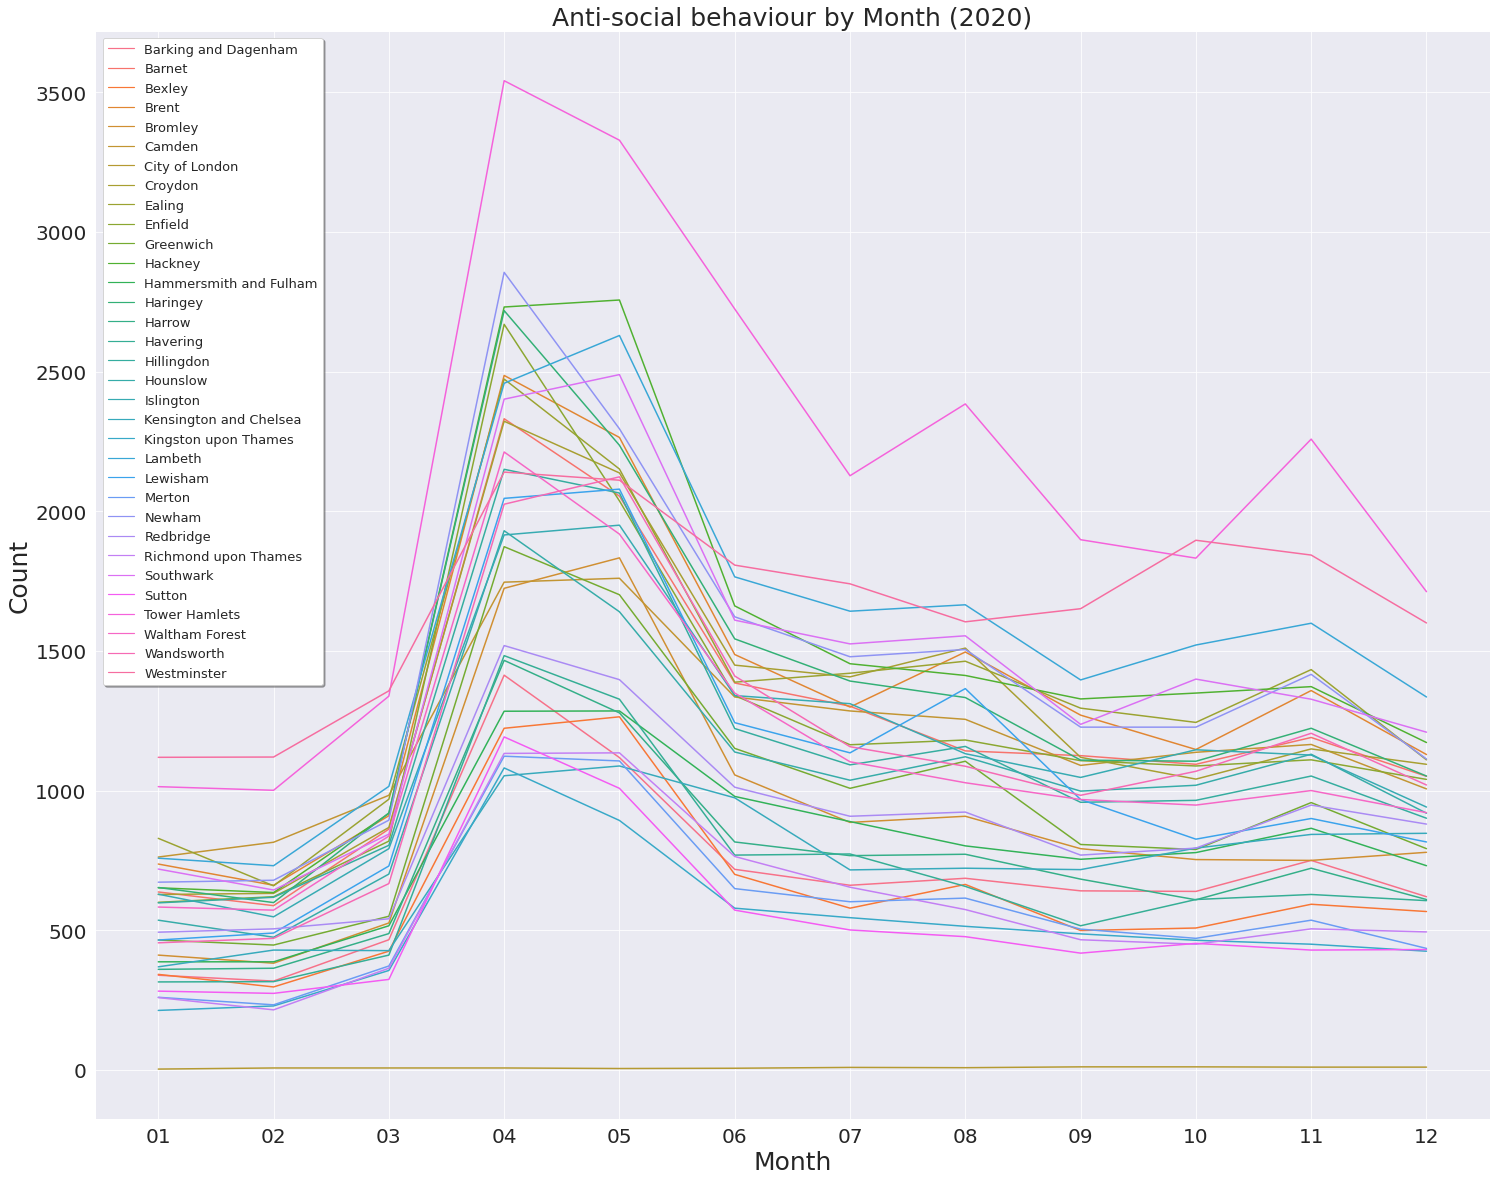

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25,20)
# plt.rcParams['legend.loc'] = 1
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.set(font_scale = 10)
sns.set_theme(style="ticks")
sns.set_context("paper")
sns.color_palette("Spectral", as_cmap=True)

mychart = sns.lineplot(data=df, linewidth=1.5, dashes=False)
mychart.set_title((crime + ' by Month ' + '(' + year + ')'), fontsize = 25)
mychart.set_xlabel("Month", fontsize = 25)
mychart.set_ylabel("Count", fontsize = 25)

# mychart.legend(loc = 2, bbox_to_anchor= (1,.75,0.1,0.1), fontsize = 15, shadow = True )
mychart.legend(loc = 2,  bbox_to_anchor= (0.001,1), fontsize = 13, shadow = True )

Text(0, 0.5, 'Count')

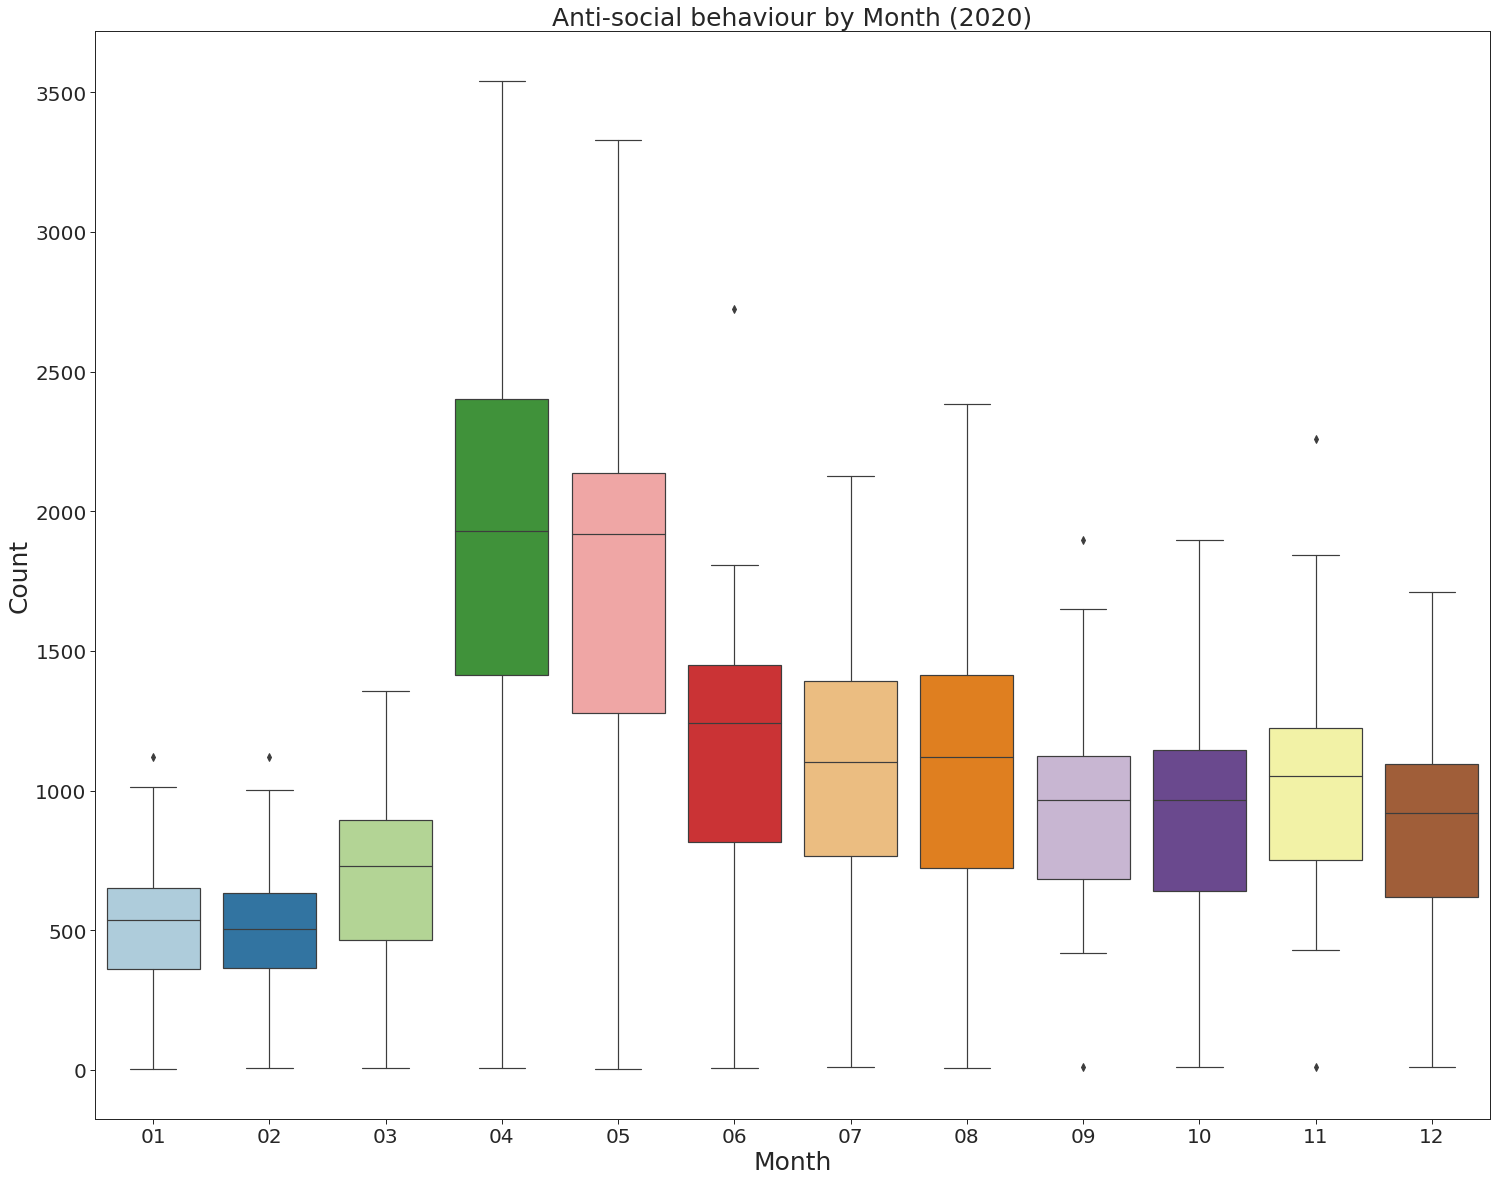

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25,20)
# plt.rcParams['legend.loc'] = 1
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.set(font_scale = 10)
sns.set_theme(style="darkgrid")
sns.set_context("paper")

mychart = sns.boxplot(data=df2, palette='Paired')
mychart.set_title((crime + ' by Month ' + '(' + year + ')'), fontsize = 25)
mychart.set_xlabel("Month", fontsize = 25)
mychart.set_ylabel("Count", fontsize = 25)